<a href="https://colab.research.google.com/github/joapen/ML-Learning-bucket/blob/main/marketbreadthdata_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

###  Project Definition  ###

PROJECT_ID = 'Looking for correlation between market breadth data, DIX, GEX, VIX and S&P 500, using LSTM neural network'

FILEPATH_MB = "/content/drive/MyDrive/public/DREAM/Amplitud-Mercado-2021-05-30.csv" 
FILEPATH_DG = "/content/drive/MyDrive/public/DREAM/DIX20210525.csv" 
FILEPATH_V = "/content/drive/MyDrive/public/DREAM/VIX20210525.csv" 

used_features = ['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME',
                 'dix',
                 'gex',
                 'vix']

description = pd.Series(['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME',
                 'dix',
                 'gex',
                 'vix'])

print("Setup Complete")

Setup Complete


# 1.- Load data

In [98]:
###   Load market breadth data    ###
df = pd.read_csv(FILEPATH_MB)
df.set_index('DATE')

###   Load dix-gex data    ###
df_dg = pd.read_csv(FILEPATH_DG)
df_dg.set_index('date')

###   Load dix-gex data    ###
df_v = pd.read_csv(FILEPATH_V)
df_v.set_index('Date')

### Copy all data to a unique dataframe   ###
df['dix'] = df_dg['dix']
df['gex'] = df_dg['gex']
df['vix'] = df_v['VixClose']

print("Setup Complete")

Setup Complete


Data ranges (From -> To)
* market breadth (1979-12-31 -> 2021-05-25 )
* dix and  gex (2011-05-02 -> 2021-05-25)
* VIX	(1990-01-02 -> 2021-05-25)

# 2.- Exploratory Data Analysis (EDA)

**** First 5 lines of data:


,DATE,ADVNASDAQ,ADVNASDAQVOLUMEN,DESNASDAQ,DESNASDAQVOLUMEN,NASDAQMAX,NASDAQMIN,NASDAQREP,NASDAQREPVOLUMEN,ADVNYSE,ADVNYSEVOLUMEN,DESNYSE,DESNYSEVOLUMEN,NYSEMAX,NYSEMIN,NYSEREP,NYSEREPVOLUMEN,SPXCLOSE,SPXVOLUME,dix,gex,vix
0,1979-12-31,500,10395,362,3735,100,11,1761,7590,755,14740,756,11310,84,75,469,5480,107.940002,31530000,0.383411,1.859731e+13,17.240000
1,1980-01-02,250,8000,1016,12798,91,24,1363,7712,442,8220,1148,29610,61,36,325,2780,105.760002,40610000,0.392122,1.717764e+13,18.190001
2,1980-01-03,178,6414,1174,13307,56,55,1270,6259,455,15710,1143,29160,14,63,324,5610,105.220001,50480000,0.405457,1.361864e+13,19.219999
3,1980-01-04,815,14608,193,2299,52,11,1612,6573,1246,31870,296,4680,47,17,329,2580,106.519997,39130000,0.418649,1.490329e+13,20.110001
4,1980-01-07,546,11813,293,3132,78,11,1786,7975,914,26060,625,13640,90,10,370,4800,106.809998,44500000,0.410321,1.677059e+13,20.260000


**** Info() data of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              10440 non-null  object 
 1   ADVNASDAQ         10440 non-null  int64  
 2   ADVNASDAQVOLUMEN  10440 non-null  int64  
 3   DESNASDAQ         10440 non-null  int64  
 4   DESNASDAQVOLUMEN  10440 non-null  int64  
 5   NASDAQMAX         10440 non-null  int64  
 6   NASDAQMIN         10440 non-null  int64  
 7   NASDAQREP         10440 non-null  int64  
 8   NASDAQREPVOLUMEN  10440 non-null  int64  
 9   ADVNYSE           10440 non-null  int64  
 10  ADVNYSEVOLUMEN    10440 non-null  int64  
 11  DESNYSE           10440 non-null  int64  
 12  DESNYSEVOLUMEN    10440 non-null  int64  
 13  NYSEMAX           10440 non-null  int64  
 14  NYSEMIN           10440 non-null  int64  
 15  NYSEREP           10440 non-null  int64  
 16  NYSERE

None

**** Missing values:   ****


,missing_values (#),missing_values (%),description
0,NaN,NaN,ADVNASDAQ
1,NaN,NaN,ADVNASDAQVOLUMEN
2,NaN,NaN,DESNASDAQ
3,NaN,NaN,DESNASDAQVOLUMEN
4,NaN,NaN,NASDAQMAX
5,NaN,NaN,NASDAQMIN
6,NaN,NaN,NASDAQREP
7,NaN,NaN,NASDAQREPVOLUMEN
8,NaN,NaN,ADVNYSE
9,NaN,NaN,ADVNYSEVOLUMEN


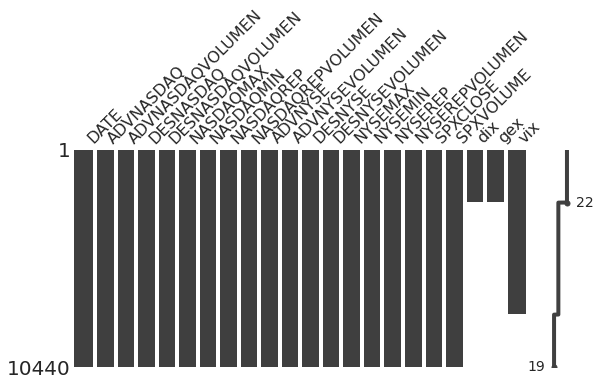

In [99]:
####        Optional     ######

###  Display basic data for the COMPLETE dataset ###

print("**** First 5 lines of data:")
display(df.head(5))
print("**** Info() data of the data set:")
display(df.info())

# Show missing values
import missingno as msno # missin data visualization
missing_value_df = pd.DataFrame({'missing_values (#)': df.isnull().sum(),
                                 'missing_values (%)': round(df.isnull().sum() * 100 / len(df),2),
                                 'description': description
                                }
                               )
print("**** Missing values:   ****")
display(missing_value_df)

# show visually missing data
msno.matrix(df, figsize=(8, 4));

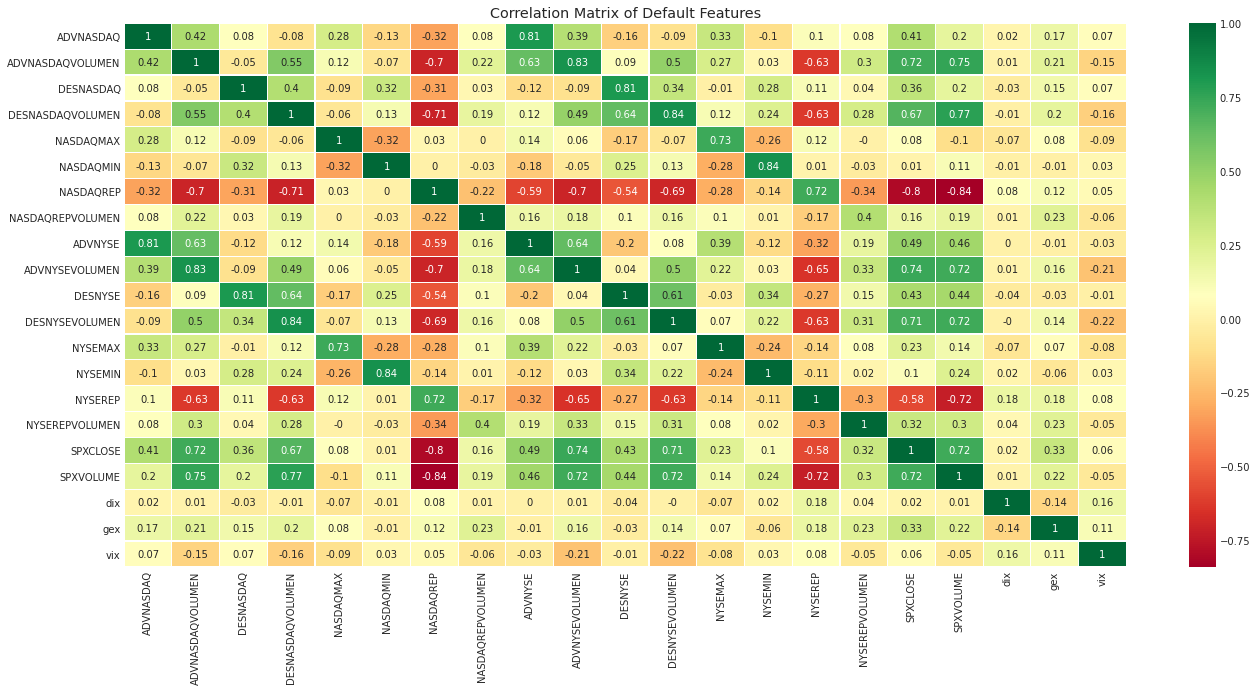

In [5]:
####        Optional     ######
# Plot correlation heatmap of original features
import matplotlib.pyplot as pltHeatMap
fig, ax = pltHeatMap.subplots(figsize=(20, 10))
corr = df.corr().round(2)
sns.heatmap(corr, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
ax.set_title('Correlation Matrix of Default Features')
del corr

# 3.- Split Train/Test dataset & dimension the data vectors

In [144]:
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

split_date = pd.to_datetime("2018-01-02")
df['DATE']= pd.to_datetime(df['DATE'])
df['DATE'] = df['DATE'].dt.date

train_data = df.loc[df['DATE'] < split_date]
test_data = df.loc[df['DATE'] > split_date]

# used for printing charts
test_date_range = test_data.DATE

train_data = train_data.drop(['DATE'], axis=1)
test_data = test_data.drop(['DATE'], axis=1)


sc = MinMaxScaler(feature_range=(0,1))
scaled_training_set = sc.fit_transform(train_data)

time_step = 120
X_train = []
Y_train = []
m = len(scaled_training_set)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(scaled_training_set[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(scaled_training_set[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

# Readjust the dataset to the indicated time_step = (initially set to 60)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print('completed')

completed


# 4.- Model
This time I'm going to use LSTM neural network.
* https://en.wikipedia.org/wiki/Long_short-term_memory
* https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

Notes:
* Pytorch’s LSTM expects all of its inputs to be 3D tensors.
* The semantics of the axes of these tensors is important.
* The first axis is the sequence itself,
* The second indexes instances in the mini-batch,
* The third indexes elements of the input.
* Let's ignore 2º axis (mini-batching), we will always have just 1D.


In [145]:
from keras.models import Sequential
from keras.layers import Activation, LSTM, Dense

# entry data
entry_dimension = (X_train.shape[1],1)

output_dimension = 1
neurons_number = 100

myModel = Sequential()
# specify the number of neurons and the shape of the entry that the LSTM should expect
myModel.add(LSTM(units=neurons_number, input_shape=entry_dimension))
# specify the output dimension through "Dense"
myModel.add(Dense(units=output_dimension))
# Add an activation function
myModel.add(Activation('tanh'))
# compile indicating optimizer=rmsprop (similar to Gradient descent) and error function loss= mse
myModel.compile(loss='mae', optimizer='rmsprop')
#myModel.compile(optimizer='rmsprop', loss='mse')

# train the model with 'fit' using 20 iterations and LSTM batch size=32 
myModel.fit(X_train,Y_train,epochs=20,batch_size=32)
print('completed')

Epoch 1/20
296/296 [==============================] - 24s 74ms/step - loss: 0.1004
Epoch 2/20
296/296 [==============================] - 22s 74ms/step - loss: 0.0869
Epoch 3/20
296/296 [==============================] - 22s 74ms/step - loss: 0.0864
Epoch 4/20
296/296 [==============================] - 22s 76ms/step - loss: 0.0861
Epoch 5/20
296/296 [==============================] - 23s 77ms/step - loss: 0.0852
Epoch 6/20
296/296 [==============================] - 22s 76ms/step - loss: 0.0859
Epoch 7/20
296/296 [==============================] - 22s 76ms/step - loss: 0.0846
Epoch 8/20
296/296 [==============================] - 22s 75ms/step - loss: 0.0851
Epoch 9/20
296/296 [==============================] - 22s 75ms/step - loss: 0.0857
Epoch 10/20
296/296 [==============================] - 23s 78ms/step - loss: 0.0835
Epoch 11/20
296/296 [==============================] - 23s 78ms/step - loss: 0.0843
Epoch 12/20
296/296 [==============================] - 23s 79ms/step - loss: 0.0847
E

# 5.- Build prediction on test dataset

In [146]:
x_test = test_data.values
x_test = sc.transform(x_test)

# Organize the validation dataset in batchs of "time_step" times that initially is set to 60
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# build the prediction
preds = myModel.predict(X_test)

# create empty table with 21 fields
full_preds_dataset = np.zeros(shape=(len(preds), 21) )
# put the predicted values in the right field
full_preds_dataset[:,0] = preds[:,0]
# inverse transform and then select the right field
preds = sc.inverse_transform(full_preds_dataset)[:,0]

print('completed')

completed


In [147]:
test_data.DATE = test_date_range

test_data['PRED'] = 0
q = test_data.index[0] + time_step + 1
# I adjust the initial value of the prediction = offset
offset = test_data.loc[q,'SPXCLOSE'] - preds[0]

for v in preds:
  test_data.PRED.loc[q] = v + offset
  q = q + 1

print("Completed")

Completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 5.1.- Check the results

In [148]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=test_date_range, y=list(test_data.SPXCLOSE)))

fig.add_trace(
    go.Scatter(x=test_date_range, y=list(test_data.PRED)))

# Set title
fig.update_layout(
    title_text="Actual SPX (per day) data Vs. prediction "
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis=dict(
        autorange=True,
        linecolor="#673ab7",
        mirror=True,
        showline=True,
        type="linear"
    )

)

fig.show()

# 6.- Let's check the performance of the prediction: TP, FP, TN, FN

In [149]:
# Start reviewing the difference between actual value and prediction
# to do it we have to take into account that time_step times the prediction is equal to zero, so we should remove that part of the array

q = test_data.index[0] + time_step + 1
resultDF = test_data.loc[q:]

dif = resultDF.SPXCLOSE - resultDF.PRED
print("completed")

completed


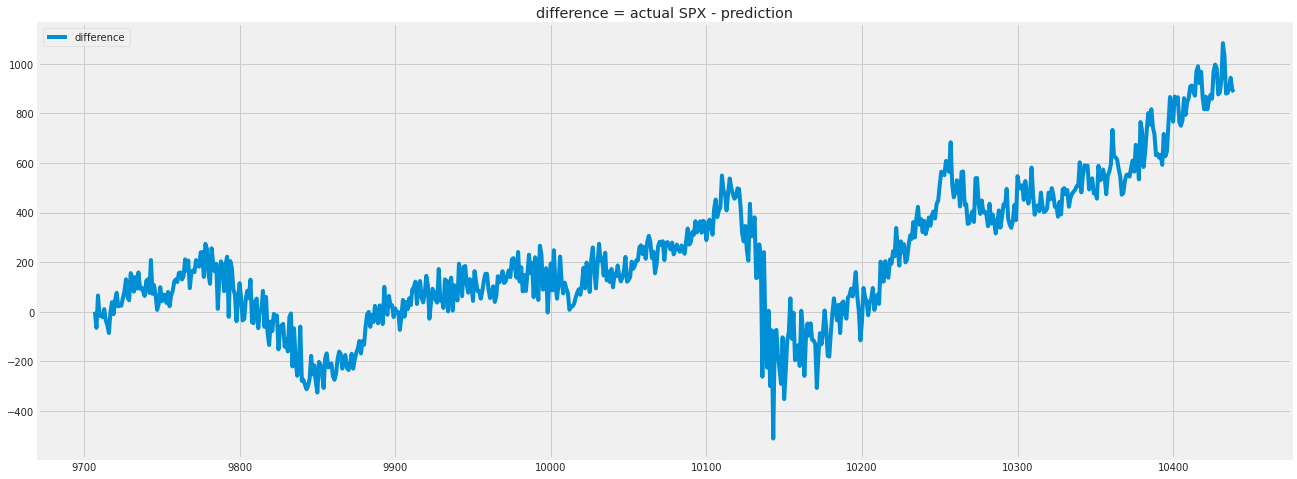

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,8))
plt.title("difference = actual SPX - prediction")
sns.lineplot(data=dif, label="difference")

In [151]:
# Let's check the table of results
TP = 0   # true positive
FP = 0   # False positive
TN = 0   # True negative
FN = 0   # False negative
accurateTP = 0 # accurate True Positive
accurateTN = 0 # accurate True Negative
totalRes = len(preds)

# I use 5 basic points as threshold (this needs to be reviewed)
threshold = 5

resultT = pd.DataFrame(resultDF.SPXCLOSE)
resultT["pred"] = resultDF.PRED
resultT["dif"] = dif

arrRes = resultT.to_numpy()

for x in arrRes:
    if (x[0]>0 and x[1]>0):
        TP += 1
        if x[2]<threshold:
            accurateTP +=1
    if (x[0]<0 and x[1]>0):
        FP += 1
    if (x[0]<0 and x[1]<0):
        TN += 1
        if x[2]<threshold:
            accurateTN +=1
    if (x[0]>0 and x[1]<0):
        FN += 1

pTP = (TP/totalRes) * 100
pAccurateTP = (accurateTP/totalRes) *100
pFP = (FP/totalRes) * 100
pTN = (TN/totalRes) * 100
pAccurateTN = (accurateTN/totalRes) *100
pFN = (FN/totalRes) * 100

print("Total = " +str(TP+FP+TN+FN))
print("\nTP = " + str(TP) + "( %2f" % pTP + " )")
print("FP = " + str(FP) + "( %2f" % pFP + " )")
print("TN = " + str(TN) + "( %2f" % pTN + " )")
print("FN = " + str(FN) + "( %2f" % pFP + " )")

print("\nright guess = " + str(TP + TN) + "( %2f" % (pTP+pTN) + " )")
print("error = " + str(FP + FN) + "( %2f" % (pFP+pFN) + " )")
print("\nAccurate TP = " + str(accurateTP) + "( %2f" % pAccurateTP + " )")
print("Accurate TN = " + str(accurateTN) + "( %2f" % pAccurateTN + " )")

Total = 733

TP = 733( 99.863760 )
FP = 0( 0.000000 )
TN = 0( 0.000000 )
FN = 0( 0.000000 )

right guess = 733( 99.863760 )
error = 0( 0.000000 )

Accurate TP = 155( 21.117166 )
Accurate TN = 0( 0.000000 )
